In [1]:
# ! pip install opencv-python

In [2]:
from matplotlib import pyplot as plt
import cv2

In [3]:
img = cv2.imread('/home/herry/下載/下載.jpeg')
img = cv2.imread('/home/herry/下載/geodata.png')
img = img[:, 200:953, :]

In [4]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(753, 753, 3)


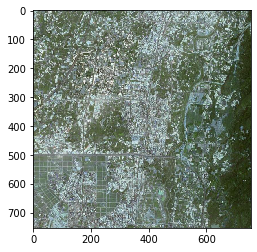

In [5]:
plt.imshow(img[:,:,:])

In [7]:
import numpy as np
import pandas as pd
df = pd.DataFrame(img.reshape((753*753, 3)))

In [8]:
from sklearn import cluster
X = img.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=4)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)
X_cluster *= 50

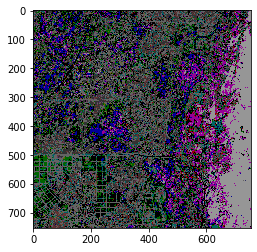

In [10]:
plt.imshow(X_cluster)
plt.show()

In [11]:
df = pd.DataFrame(X_cluster[:,:,0]).stack().reset_index()

In [12]:
X_cluster[50][50]

array([0, 0, 0], dtype=int32)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(df[['level_0', 'level_1']], df[0])
df_tmp = df.copy()
df_tmp[0] = knn.predict(df_tmp[['level_0', 'level_1']])

In [15]:
img = pd.pivot_table(df_tmp, index=['level_0'], columns=['level_1'], values=[0]).values

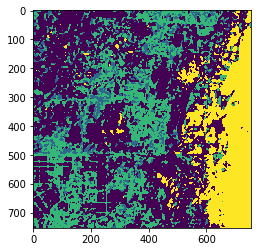

In [16]:
plt.imshow(img)
plt.show()

In [17]:
img.shape

(753, 753)

In [18]:
rgb_l = []
for row in range(X_cluster.shape[0]):
    for col in range(X_cluster.shape[1]):
        rgb_l.append(X_cluster[row][col])

In [19]:
df_tmp = pd.DataFrame(rgb_l)
df_tmp['row'] = df_tmp.index // X_cluster.shape[0]
df_tmp['col'] = df_tmp.index % X_cluster.shape[1]

In [20]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(df_tmp[['row', 'col']], df_tmp[[0, 1, 2]])
df_tmp = df_tmp.copy()
df_tmp[[0, 1, 2]] = knn.predict(df_tmp[['row', 'col']])

In [21]:
r = pd.pivot_table(df_tmp, index=['row'], columns=['col'], values=[0]).values
g = pd.pivot_table(df_tmp, index=['row'], columns=['col'], values=[1]).values
b = pd.pivot_table(df_tmp, index=['row'], columns=['col'], values=[2]).values

In [22]:
rgb_l = []
for index, row in df_tmp.iterrows():
    rgb_l.append(np.array(row[:3]))

In [23]:
df_tmp['rgb'] = rgb_l

In [24]:
img = np.array(rgb_l).reshape((753, 753, 3))

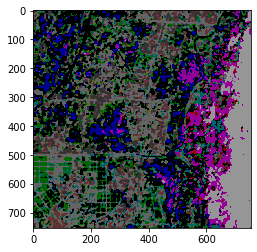

In [25]:
plt.imshow(img)
plt.show()